# Especialização em IoT - Data analytics for IoT
# Aula 04 - Importação e limpeza de dados

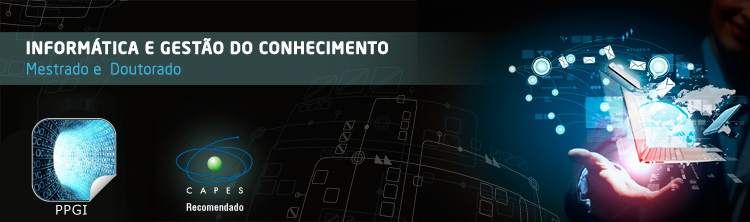

<p style="text-align: center;"><a href="https://www.uninove.br/cursos/mestrado-e-doutorado/presencial/mestrado-e-doutorado-em-inform%C3%A1tica-e-gest%C3%A3o-do-conhecimento"><b>Conheça o Programa de Mestrado e Doutorado em Informática e Gestão do Conhecimento da UNINOVE</b></a></p>

> **Resumo da aula**: Vamos importar algumas bibliotecas comuns de ciência de dados (`pandas`, `numpy`, `pyjanitor`, etc). Usando `pandas` vamos carregar diferentes tipos de arquivos. Em seguida vamos limpar os dados usando diversas ferramentas nativas do `pandas` e depois usando `pyjanitor`. Ao final, esperamos ter um quadro de dados pronto para análises subsequentes

# Índice

[O que é o `Pandas`](#pandas) <br>
[O que é o `Numpy`](#numpy) <br>
[O que é o `Pyjanitor`](#janitor) <br>
[Carregando as bibliotecas](#carregando_bibliotecas) <br>
[Carregando arquivos](#carregando_arquivos) <br>
[Exemplo de carregamento de arquivos](#exemplo_carregamento_arquivos) <br>
[Alterando parâmetros de visualização do `Pandas`](#alterando_visualizacao) <br>
[Métodos de inspeção visual](#inspecao_visual) <br>
[Copiando um quadro de dados (`DataFrame`)](#copiando_quadros) <br>
[Tipo de dados (`dtype`) do `pandas`](#tipos_dados) <br>
[Atributos de um quadro de dados (`DataFrame`)](#atributos_dados) <br>
[Manipulando nomes de colunas](#colunas) <br>
[Manipulando tipos de dados](#manipulado_tipos) <br>
[ ](#) <br>
[ ](#) <br>
[Bibliografia adicional](#bibliografia) <br>


<br>

<a name="pandas">
<H1> O que é o <code>pandas</code> (abreviação: <code>pd</code>) </H1>
</a>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/512px-Pandas_logo.svg.png"  width = 250\>

Segundo a equipe mantenedora do `pandas`:

> `pandas` é uma ferramenta de análise e manipulação aberta (*open source*) rápida, poderosa, flexível e fácil de usar, construída com base na linguagem de programação `Python`

`pandas` tem como objetivo ser um alicerce de alto nível para desenvolver projetos práticos de análise de dados do mundo real em `Python`. Além disso, tem o objetivo mais amplo de se tornar a ferramenta de análise / manipulação aberta mais poderosa e flexível em qualquer linguagem de programação.

Se você vem de programação em `R`, você perceberá algumas similaridades - afinal `pandas` usa muitos aspectos do `R` (particularmente do paradigma `tidyverse`) como inspiração para suas implementações.

[No site oficial](https://pandas.pydata.org/) você encontra todas as informações sobre o `pandas`, documentação, etc.

> **Dica**: a documentação oficial do `pandas` é essencial para se tornar fluente no seu uso. Trata-se de um dos melhores esforços de documentação e exemplificação que eu já vi.

> **Dica**: ao longo do curso, um link é fornecido sempre que apresentados pela primeira vez um método ou atributo (caso tenha mais de um parâmetro)

O `pandas` tem como objetivo básico ser uma 'central' de análise de dados e, por isso, as principais atividades de uma sequência de passos (*pipeline*) de análise já são implementadas.

> **Dica**: `pandas` é implementado em cima da biblioteca `numpy` (ver abaixo) e por isso é muito comum carregar ambas bibliotecas.

<a name="numpy">
<H1> O que é o <code>numpy</code> (abreviação: <code>np</code>)</H1>
</a>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/NumPy_logo_2020.svg/512px-NumPy_logo_2020.svg.png"  width = 250\>

Segundo a equipe mantenedora do `numpy`:

> `numpy` é um projeto de código aberto cujo objetivo é permitir computação numérica com `Python`. Foi criado 2005 e construído com base nas bibliotecas prévias `Numeric` e `Numarray`

`numpy` é uma bibliota que dá suporte a operações em matrizes e *arrays* multidimensionais e também oferece uma variedade enorme de funções de alto nível para operar em matrizes e *arrays*.

A biblioteca `pandas` usa fortemente `numpy` (debaixo do capô) e, por mais que não seja o foco do curso, é importante conhecer o básico de `numpy` por este motivo.

[No site oficial](https://numpy.org/) você encontra todas as informações sobre o `numpy`, documentação, etc.

<a name="janitor">
<H1> O que é o <code>pyjanitor</code> (abreviação: <code>jn</code>)</H1>
</a>

<img src="data/pyjanitor.svg"  width = 200\>

Segundo a equipe mantenedora do `pyjanitor`:

> `pyjanitor` é um projeto que extende o `pandas` por meio de uma Interface de Programação de Aplicação (API) baseada em verbos, fornecendo rotinas de limpeza de dados conveniente para tarefas repetitivas


Em sua origem, o projeto `pyjanitor` era uma conversão (*port*) do pacote do `R` `janitor` para `python`, mas aos poucos foi evoluindo para se adequar a um fluxo de trabalho centrado no paradigma `pandas`. As similaridades (principalmente encadeamento de métodos do `pandas` e `pyjanitor`) são reflexos diretos do `R`.

A biblioteca `pyjanitor ` usa a biblioteca `pandas_flavor` que permite acessar objetos `pandas` (quadros de dados e séries) e a aplicar métodos externos ao `pandas`. `pyjanitor ` foi pensado para uso em conjunto com o `pandas` e por isso não tem conflitos com nomes de métodos e atributos originais do `pandas`, permitindo um uso seguro.

> **Dica**: O nome da biblioteca é `pyjanitor` já que é a versão do `janitor` do `R` para `Python`. Se você rodar `pip install janitor` vai dar erro na hora de usar (há outra biblioteca com esse nome). Use `pip install pyjanitor`. Use o nome `janitor` quando for importar.

> **Dica**: Erros eventuais no uso do `pyjanitor` ocorrem por não carregar `pandas_flavor`. Importe `pyjanitor` com `import pandas_flavor as pf` e provavelmente os erros desaparecerão.

[No site oficial](https://pyjanitor-devs.github.io/pyjanitor/) você encontra todas as informações sobre o `pyjanitor`, documentação, etc.

<a name="carregando_bibliotecas">
<H1> Carregando as bibliotecas</H1>
</a>

Vamos iniciar carregando as bibliotecas citadas acima:

In [2]:
import pandas as pd
import numpy as np
import janitor as jn
import pandas_flavor as pf

<a name="carregando_bibliotecas">
<H1> Objetos do <code>pandas</code></H1>
</a>

Como parte da orientação a objetos do `Python`, a biblioteca `pandas` tem dois objetos principais:

* `DataFrame` (quadro de dados)
* `Series` (série)

Uma série (`Series`) é um *array* unidimensional capaz de guardar qualquer tipo de dados (`int`, `str`, `float`, etc). Ao combinar diversas séries, você obtém um quadro de dados. Alternativamente, tendo um quadro de dados na memória e requisitar uma coluna retorna (dependendo do comando) uma série. Isto é, um quadro de dados do `pandas` tem geralmente muitas colunas (apesar de ser possível ter uma só também) e cada coluna pode ser extraída e tratada como uma série:


<img src="data/serie_dataframe.png" width="600"/>



É importante saber estas diferenças porque em determinados momentos, usam-se métodos e atributos diferentes dependendo do objeto a ser tratado (`DataFrame` ou `Series`) - não é erro, é confundir tipo de objeto e quais métodos se aplicam a cada.

> **Dica**: independentemente do tipo de arquivo (`.csv`, `.xlsx`, etc) o `pandas` cria, por padrão, um quadro de dados (`DataFrame`) quando o arquivo é carregado.

É bom lembrar a diferença entre matrizes e quadros de dados. Com as palavras de Hadley Wickham:

> *Uma **matriz** tem linhas e colunas. Um **quadro de dados** tem observações e variáveis.

<img src="data/hadley.png" width = 450>

## Atributos e métodos


s_attr_methods = set(dir(pd.Series))
len(s_attr_methods)

df_attr_methods = set(dir(pd.DataFrame))
len(df_attr_methods)

len(s_attr_methods & df_attr_methods)

<a name="carregando_arquivos">
<H1> Carregando arquivos</H1>
</a>

`pandas` suporta uma grande quantidade de formatos de arquivos em seus métodos de carregamento. 

<a href="https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html">
<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg" width="900"/> </a>


Entre estes formatos, temos:

| Formato   | Entrada (Input)       | Saída (Output)    | Observação                     |
| --------- | --------------------- | ----------------- | ------------------------------ |
| CSV       | `pd.read_csv()`       | `.to_csv()`       | Arquivo Texto CSV, TSV, etc    |
| XLS/XLSX  | `pd.read_excel()`     | `.to_excel()`     | Planilha                       |
| HDF       | `pd.read_hdf`()       | `.to_hdf()`       | HDF5 database                  |
| SQL       | `pd.read_sql()`       | `.to_sql()`       | SQL table                      |
| JSON      | `pd.read_json()`      | `.to_json()`      | JavaScript Object Notation     |
| MSGPACK   | `pd.read_msgpack()`   | `.to_msgpack()`   | Portable binary format         |
| HTML      | `pd.read_html()`      | `.to_html()`      | código HTML                    |
| GBQ       | `pd.read_gbq()`       | `.to_gbq()`       | Google Big Query format        |
| DTA       | `pd.read_stata()`     | `.to_stata()`     | Stata                          |
| Parquet   | `pd.read_parquet()`   | `.to_parquet()`   | Apache Parquet                 |
| Feather   | `pd.read_feather()`   | `.to_feather()`   | Apache Feather                 |
| Qualquer  | `pd.read_clipboard()` | `.to_clipboard()` | Ex., de pág HTML               |
| Qualquer  | `pd.read_pickle()`    | `.to_pickle()`    | (Structured) Python object     |
|Fonte: Adaptado de [storopoli.io](storopoli.io) |


Vamos focar em dados tabulares `.csv` e `.xls` ou `.xlsx` durante o curso. Verfique a documentação de cada método caso precise carregar arquivos em outros formatos.

<a name="exemplo_carregamento_arquivos">
<H1>Exemplo de carregamento de arquivos</H1>
</a>


Vamos carregar um arquivo `.csv` contendo pedaço da base de filmes da Internet Movie Database - [IMDB](https://www.imdb.com/). Note que é preciso usar a abreviação `pd` em conjunto com a função desejada [`pd.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

> **Dica**: O arquivo em formato `.csv` por padrão separa valores por vírgula (daí seu nome), mas é possível usar outros separadores (`tab`, `;`, etc). É comum usar `;` no Brasil e se for seu caso, passe o parâmetro `sep = ";" ` dentro dos parênteses.

> **Dica**: Além disso, dependendo de onde seus dados vierem, pode ser necessário passar como parâmetro a codificação (*encoding*) - `UTF-8`, `latin-1`, etc. Por exemplo: `encoding = "latin-1"`.

In [2]:
# filmes = pd.read_csv('data/imdb_filmes.csv') ... está faltando algo!

In [3]:
filmes = pd.read_csv('data/imdb_filmes.csv', sep = ";", encoding = "UTF-8")

> **Dica**: É comum chamar objetos `pandas` de `df` (`DataFrame`), para poder reutilizar futuramente os códigos sem muita alteração:

In [4]:
df = pd.read_csv('data/imdb_filmes.csv', sep = ";")

Digite o nome do objeto para ter uma visualização do mesmo. 

In [5]:
df

,cor,nome do diretor,número de críticos,duração,likes no FACE (diretor),nome do segundo ator,receita $,gêneros,nome (ator1),título do filme,...,nome ator 3,movie_imdb_link,língua,país,content_rating,orçamento,ano,nota no IMDB,likes FaceBook do filme,u97ft
0,Color,James Cameron,723.0,178.0,0.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,...,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13,237000000.0,2009.0,7.9,33000.0,NaN
1,Color,Gore Verbinski,302.0,169.0,563.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,...,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13,300000000.0,2007.0,7.1,0.0,NaN
2,Color,Sam Mendes,602.0,148.0,0.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,...,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13,245000000.0,2015.0,6.8,85000.0,NaN
3,Color,Christopher Nolan,813.0,164.0,22000.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,...,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13,250000000.0,2012.0,8.5,164000.0,NaN
4,NaN,Doug Walker,NaN,NaN,131.0,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,...,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,7.1,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,Color,NaN,43.0,43.0,NaN,Valorie Curry,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,...,Sam Underwood,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,English,USA,TV-14,NaN,NaN,7.5,32000.0,NaN
4913,Color,Benjamin Roberds,13.0,76.0,0.0,Maxwell Moody,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,...,David Chandler,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,English,USA,NaN,1400.0,2013.0,6.3,16.0,NaN
4914,Color,Daniel Hsia,14.0,100.0,0.0,Daniel Henney,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,...,Eliza Coupe,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,English,USA,PG-13,NaN,2012.0,6.3,660.0,NaN
4915,Color,Jon Gunn,43.0,90.0,16.0,Brian Herzlinger,85222.0,Documentary,John August,My Date with Drew,...,Jon Gunn,http://www.imdb.com/title/tt0378407/?ref_=fn_t...,English,USA,PG,1100.0,2004.0,6.6,456.0,NaN


Note que o `pandas` automaticamente cria uma coluna de índices à esquerda. Dependendo do conteúdo do seu quadro de dados, você pode preferir que uma coluna conetndo datas ou outro dado seja o índice - mais adiante vamos ver como alterar isso. 

> **Dica**: Se você já conhece os dados previamente e quer definir outra coluna como índice desde o início, passe `index_col = "nome_da_coluna"` dentro de `pd.read_csv()`.

<a name="alterando_visualizacao">
<H1>Alterando visualização de um quadro de dados</H1>
</a>


Como você percebe, dependendo das dimensões do seu quadro de dados, pode ser difícil visualizar tudo.  Vamos alterar como o `pandas` apresenta os resultados para máximo de 8 colunas e 10 linhas. Veja a [documentação do `pandas` e as opções que existem (são várias)](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html).

In [6]:
pd.set_option("max_columns", 8, "max_rows", 10)

O `pandas` transforma números maiores em notação científica. Por exemplo, **4.055000e+03** significa $4.055 * 10 ^ 3$. Para a maioria das pessoas, é dificil de ler. Você pode usar criar uma função (como a de abaixo) para travar a apresentação em 2 decimais:

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

> **Dica**: Você pode apresentar todas as colunas passando o parâmetro `None`, mas pode ser muito dado na tela!
```
pd.set_option('max_columns', None, 'max_rows', 10)
```

> **Dica**: Você pode sempre reiniciar as condições de apresentação com o código:
```
pd.reset_option("^display")
```

In [8]:
pd.reset_option("^display")

<a name="inspecao_visual">
<H1>Métodos de inspeção visual</H1>
</a>

Existem muitos métodos de análise de dados no `pandas` que veremos na próxima aula. Hoje, vamos ver alguns métodos básicos para inspeção visual do nosso quadro de dados:

* `.head()`: extrai as primeiras linhas do quadro de dados (por padrão 5, mas você pode explicitar outro número inteiro)
* `.tail()`: extrai as últimas linhas do quadro de dados (por padrão 5, mas você pode explicitar outro número inteiro)
* `.sample()`: extrai aleatoriamente uma linha do quadro de dados (por padrão 1, mas você pode explicitar outro número inteiro)

O método [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) usa um gerador de número pseudoaleatório e por isso a cada uso retorna algo diferente. 

> **Dica**: Você pode "travar" a resposta (para reprodutibilidade, por exemplo) passando algum valor no parâmetro `random_state = ...` (equivale ao `set.seed()` do `R`).

In [9]:
df.head(3)

,cor,nome do diretor,número de críticos,duração,likes no FACE (diretor),nome do segundo ator,receita $,gêneros,nome (ator1),título do filme,...,nome ator 3,movie_imdb_link,língua,país,content_rating,orçamento,ano,nota no IMDB,likes FaceBook do filme,u97ft
0,Color,James Cameron,723.0,178.0,0.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,...,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13,237000000.0,2009.0,7.9,33000.0,NaN
1,Color,Gore Verbinski,302.0,169.0,563.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,...,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13,300000000.0,2007.0,7.1,0.0,NaN
2,Color,Sam Mendes,602.0,148.0,0.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,...,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13,245000000.0,2015.0,6.8,85000.0,NaN


In [10]:
df.tail()

,cor,nome do diretor,número de críticos,duração,likes no FACE (diretor),nome do segundo ator,receita $,gêneros,nome (ator1),título do filme,...,nome ator 3,movie_imdb_link,língua,país,content_rating,orçamento,ano,nota no IMDB,likes FaceBook do filme,u97ft
4912,Color,NaN,43.0,43.0,NaN,Valorie Curry,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,...,Sam Underwood,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,English,USA,TV-14,NaN,NaN,7.5,32000.0,NaN
4913,Color,Benjamin Roberds,13.0,76.0,0.0,Maxwell Moody,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,...,David Chandler,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,English,USA,NaN,1400.0,2013.0,6.3,16.0,NaN
4914,Color,Daniel Hsia,14.0,100.0,0.0,Daniel Henney,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,...,Eliza Coupe,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,English,USA,PG-13,NaN,2012.0,6.3,660.0,NaN
4915,Color,Jon Gunn,43.0,90.0,16.0,Brian Herzlinger,85222.0,Documentary,John August,My Date with Drew,...,Jon Gunn,http://www.imdb.com/title/tt0378407/?ref_=fn_t...,English,USA,PG,1100.0,2004.0,6.6,456.0,NaN
4916,Black and White,Michael Mann,174.0,165.0,0.0,Jada Pinkett Smith,58183966.0,Biography|Drama|Sport,Will Smith,Ali,...,Joe Morton,http://www.imdb.com/title/tt0248667/?ref_=fn_t...,English,USA,R,107000000.0,2001.0,6.8,0.0,NaN


In [11]:
df.sample()
# df.sample(random_state = 51)

,cor,nome do diretor,número de críticos,duração,likes no FACE (diretor),nome do segundo ator,receita $,gêneros,nome (ator1),título do filme,...,nome ator 3,movie_imdb_link,língua,país,content_rating,orçamento,ano,nota no IMDB,likes FaceBook do filme,u97ft
986,Color,Andrew Bergman,51.0,117.0,31.0,Rumer Willis,32800000.0,Comedy|Crime|Drama|Thriller,Demi Moore,Striptease,...,Paul Guilfoyle,http://www.imdb.com/title/tt0117765/?ref_=fn_t...,English,USA,R,40000000.0,1996.0,4.3,877.0,NaN


<a name="copiando_quadros">
    <H1>Copiando um quadro de dados (<code>DataFrame</code>)</H1>
</a>

Um problema recorrente  é fazer alterações indesejadas no seus dados e ter que retroceder os passos. Quando você está usando um arquivo pequeno, não é problema recarregar o arquivo. No entanto, se você estiver usando um arquivo com gigabytes de tamanho, já não é tão prático assim.

Após importar um arquivo para o `pandas`, um objeto é criado. Caso você queira criar uma cópia, existem duas formas: a rasa (`shallow`) e profunda (`deep`):

* Na **rasa** (`shallow`), o novo objeto se referencia aos conteúdos do objeto original - isto é, uma alteração o objeto original reflete em alteração na cópia.
* Na **profunda** (`deep`), alterações no objeto original não afetam a cópia.

Fazer algo como `df2 = df` cria uma cópia rasa, que pode ser arriscado.

Vamos ver duas formas de fazer cópia profunda - pela biblioteca `copy` e o modo nativo do `pandas`

### Usando a biblioteca `copy`

Vamos primeiro importar a biblioteca `copy` e usar a função `deepcopy()`, passando como parâmetro o objeto que queremos copiar:

In [13]:
import copy

# faz uma cópia sem alterar o original
df2 = copy.deepcopy(filmes)

Verifique se ambos os quadros de dados (`df`e `df2`) se referem ao mesmo objeto na memória:

In [14]:
df2 is df

False

Exemplo: vamos apagar uma coluna do quadro `df2`. O método [`.drop("nome")`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) recebe um parâmetro opcional numérico (0 = índices; 1 = colunas):

In [15]:
df2 = df2.drop("gêneros", 1)

Confira se houve alteração em `df` e `df2`:

In [16]:
df2

,cor,nome do diretor,número de críticos,duração,likes no FACE (diretor),nome do segundo ator,receita $,nome (ator1),título do filme,numero de usuários votantes,nome ator 3,movie_imdb_link,língua,país,content_rating,orçamento,ano,nota no IMDB,likes FaceBook do filme,u97ft
0,Color,James Cameron,723.0,178.0,0.0,Joel David Moore,760505847.0,CCH Pounder,Avatar,886204,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13,237000000.0,2009.0,7.9,33000.0,NaN
1,Color,Gore Verbinski,302.0,169.0,563.0,Orlando Bloom,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13,300000000.0,2007.0,7.1,0.0,NaN
2,Color,Sam Mendes,602.0,148.0,0.0,Rory Kinnear,200074175.0,Christoph Waltz,Spectre,275868,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13,245000000.0,2015.0,6.8,85000.0,NaN
3,Color,Christopher Nolan,813.0,164.0,22000.0,Christian Bale,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13,250000000.0,2012.0,8.5,164000.0,NaN
4,NaN,Doug Walker,NaN,NaN,131.0,Rob Walker,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,7.1,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,Color,NaN,43.0,43.0,NaN,Valorie Curry,NaN,Natalie Zea,The Following,73839,Sam Underwood,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,English,USA,TV-14,NaN,NaN,7.5,32000.0,NaN
4913,Color,Benjamin Roberds,13.0,76.0,0.0,Maxwell Moody,NaN,Eva Boehnke,A Plague So Pleasant,38,David Chandler,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,English,USA,NaN,1400.0,2013.0,6.3,16.0,NaN
4914,Color,Daniel Hsia,14.0,100.0,0.0,Daniel Henney,10443.0,Alan Ruck,Shanghai Calling,1255,Eliza Coupe,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,English,USA,PG-13,NaN,2012.0,6.3,660.0,NaN
4915,Color,Jon Gunn,43.0,90.0,16.0,Brian Herzlinger,85222.0,John August,My Date with Drew,4285,Jon Gunn,http://www.imdb.com/title/tt0378407/?ref_=fn_t...,English,USA,PG,1100.0,2004.0,6.6,456.0,NaN


In [17]:
df

,cor,nome do diretor,número de críticos,duração,likes no FACE (diretor),nome do segundo ator,receita $,gêneros,nome (ator1),título do filme,...,nome ator 3,movie_imdb_link,língua,país,content_rating,orçamento,ano,nota no IMDB,likes FaceBook do filme,u97ft
0,Color,James Cameron,723.0,178.0,0.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,...,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13,237000000.0,2009.0,7.9,33000.0,NaN
1,Color,Gore Verbinski,302.0,169.0,563.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,...,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13,300000000.0,2007.0,7.1,0.0,NaN
2,Color,Sam Mendes,602.0,148.0,0.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,...,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13,245000000.0,2015.0,6.8,85000.0,NaN
3,Color,Christopher Nolan,813.0,164.0,22000.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,...,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13,250000000.0,2012.0,8.5,164000.0,NaN
4,NaN,Doug Walker,NaN,NaN,131.0,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,...,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,7.1,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,Color,NaN,43.0,43.0,NaN,Valorie Curry,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,...,Sam Underwood,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,English,USA,TV-14,NaN,NaN,7.5,32000.0,NaN
4913,Color,Benjamin Roberds,13.0,76.0,0.0,Maxwell Moody,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,...,David Chandler,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,English,USA,NaN,1400.0,2013.0,6.3,16.0,NaN
4914,Color,Daniel Hsia,14.0,100.0,0.0,Daniel Henney,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,...,Eliza Coupe,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,English,USA,PG-13,NaN,2012.0,6.3,660.0,NaN
4915,Color,Jon Gunn,43.0,90.0,16.0,Brian Herzlinger,85222.0,Documentary,John August,My Date with Drew,...,Jon Gunn,http://www.imdb.com/title/tt0378407/?ref_=fn_t...,English,USA,PG,1100.0,2004.0,6.6,456.0,NaN


### Usando o método `.copy()` nativo do `pandas`

`pandas` tem um modo próprio de cópia, [`.copy()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html), que pode ser mais prático, já que se integra muito bem ao fluxo de trabalho `pandas`. Por outro lado, pode não ser acessável fora de um objeto `pandas`.

In [18]:
df3 = df.copy(deep = True)

Vamos fazer os mesmos passos do exercício anterior:

In [19]:
df3 = df3.drop("gêneros", 1)

Confira se houve alteração em `df` e `df3`:

In [20]:
df3

,cor,nome do diretor,número de críticos,duração,likes no FACE (diretor),nome do segundo ator,receita $,nome (ator1),título do filme,numero de usuários votantes,nome ator 3,movie_imdb_link,língua,país,content_rating,orçamento,ano,nota no IMDB,likes FaceBook do filme,u97ft
0,Color,James Cameron,723.0,178.0,0.0,Joel David Moore,760505847.0,CCH Pounder,Avatar,886204,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13,237000000.0,2009.0,7.9,33000.0,NaN
1,Color,Gore Verbinski,302.0,169.0,563.0,Orlando Bloom,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13,300000000.0,2007.0,7.1,0.0,NaN
2,Color,Sam Mendes,602.0,148.0,0.0,Rory Kinnear,200074175.0,Christoph Waltz,Spectre,275868,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13,245000000.0,2015.0,6.8,85000.0,NaN
3,Color,Christopher Nolan,813.0,164.0,22000.0,Christian Bale,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13,250000000.0,2012.0,8.5,164000.0,NaN
4,NaN,Doug Walker,NaN,NaN,131.0,Rob Walker,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,7.1,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,Color,NaN,43.0,43.0,NaN,Valorie Curry,NaN,Natalie Zea,The Following,73839,Sam Underwood,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,English,USA,TV-14,NaN,NaN,7.5,32000.0,NaN
4913,Color,Benjamin Roberds,13.0,76.0,0.0,Maxwell Moody,NaN,Eva Boehnke,A Plague So Pleasant,38,David Chandler,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,English,USA,NaN,1400.0,2013.0,6.3,16.0,NaN
4914,Color,Daniel Hsia,14.0,100.0,0.0,Daniel Henney,10443.0,Alan Ruck,Shanghai Calling,1255,Eliza Coupe,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,English,USA,PG-13,NaN,2012.0,6.3,660.0,NaN
4915,Color,Jon Gunn,43.0,90.0,16.0,Brian Herzlinger,85222.0,John August,My Date with Drew,4285,Jon Gunn,http://www.imdb.com/title/tt0378407/?ref_=fn_t...,English,USA,PG,1100.0,2004.0,6.6,456.0,NaN


In [21]:
df

,cor,nome do diretor,número de críticos,duração,likes no FACE (diretor),nome do segundo ator,receita $,gêneros,nome (ator1),título do filme,...,nome ator 3,movie_imdb_link,língua,país,content_rating,orçamento,ano,nota no IMDB,likes FaceBook do filme,u97ft
0,Color,James Cameron,723.0,178.0,0.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,...,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13,237000000.0,2009.0,7.9,33000.0,NaN
1,Color,Gore Verbinski,302.0,169.0,563.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,...,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13,300000000.0,2007.0,7.1,0.0,NaN
2,Color,Sam Mendes,602.0,148.0,0.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,...,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13,245000000.0,2015.0,6.8,85000.0,NaN
3,Color,Christopher Nolan,813.0,164.0,22000.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,...,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13,250000000.0,2012.0,8.5,164000.0,NaN
4,NaN,Doug Walker,NaN,NaN,131.0,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,...,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,7.1,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,Color,NaN,43.0,43.0,NaN,Valorie Curry,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,...,Sam Underwood,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,English,USA,TV-14,NaN,NaN,7.5,32000.0,NaN
4913,Color,Benjamin Roberds,13.0,76.0,0.0,Maxwell Moody,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,...,David Chandler,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,English,USA,NaN,1400.0,2013.0,6.3,16.0,NaN
4914,Color,Daniel Hsia,14.0,100.0,0.0,Daniel Henney,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,...,Eliza Coupe,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,English,USA,PG-13,NaN,2012.0,6.3,660.0,NaN
4915,Color,Jon Gunn,43.0,90.0,16.0,Brian Herzlinger,85222.0,Documentary,John August,My Date with Drew,...,Jon Gunn,http://www.imdb.com/title/tt0378407/?ref_=fn_t...,English,USA,PG,1100.0,2004.0,6.6,456.0,NaN


> **Dica**: Conforme os tamanhos dos seus quadros de dados cresçam, vale a pena pensar antes de criar cópias. É recomendado que você tenha memória RAM de 2 a 3 vezes o tamanho dos dados a serem analisados - o que inclui eventuais cópias!

<a name="tipos_dados">
<H1> Tipos de dados (<code>dtype</code>) do <code>pandas</code> </H1>
</a>

Trabalhar com dados estruturados tabulares é uma grande vantagem - sendo o `.csv` um dos principais formatos que emergiram nas últimas décadas. O problema com `.csv` e outros formatos é que não trazem em si o tipo de dado por coluna. É necessário inspecionar se o `pandas` interpretou corretamente os dados quando carregados.

`pandas` tem diversos tipos de dados (*data types* ou `dtype`), com alguma equivalência aos tipos de dados base do `Python`. Como o `pandas` é construído com base no `numpy` é comum fazermos alterações nos tipos de dados para economizar memória, por exemplo.



| Pandas dtype    | Python type    | NumPy type                                | Uso                                                   |
|-----------------|----------------|-------------------------------------------|-------------------------------------------------------|
| `object`        | `str` ou misto | *string_*, *unicode_*, misto              | Texto ou misto de valores `numeric` and `non-numeric` |
| `int64`         | `int`          | *int_*, `int8`, `int16`, `int32`, `int64` | Número Inteiros                                       |
| `float64`       | `float`        | *float_*, `float16`, `float32`, `float64` | Número Reais                                          |
| `bool`          | `bool`         | `bool`                                    | Verdadeiro ou Falso                                   |
| `datetime64`    | NA             | `datetime64[ns]`                          | Data e Hora                                           |
| `timedelta[ns]` | NA             | NA                                        | Diferença entre duas `datetimes`                      |
| `category`      | NA             | NA                                        | Lista Finita de Valores em Texto                      |
| Fonte: Adaptado de [storopoli.io](storopoli.io) |

Em uma das últimas versões do `pandas` foi reintroduzido o tipo `str`.

O atributo [`.dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) retorna o tipo de objeto `pandas` de cada coluna.
`pandas` usa nomes diferentes do `Python` base para seus objetos (todos com base em `numpy`, vide tabela acima):

* `object`: representa valores em caracteres (`str`) ou mistos (mais de um tipo)
* `int64`: inteiros (ex.: `365`)
* `float64`: racionais (ex.: `3.5` - `Python` por padrão usa ponto e não vírgula)
* `bool`: booleanos (`True` e `False`)
* `datetime64`: datas (incluindo horas, segundos, etc.)
* `timedelta`: diferenças entre datas
* `category`: dados categóricos (ex.: `SP`, `RJ`, `BA`, etc.)

Perceba que `pandas` armazena por padrão em 64 bits e, dependendo da extensão (`range`) dos dados de uma coluna, é desperdício (especialmente em quadros de dados grandes). Se você gosta de escovar bit, dá pra alterar pra `int32`, `int16`, etc. O mesmo pros demais (`float`, etc). Mais adiante veremos como alterar os tipos de dados de uma coluna.
> **Dica**: o `dtype` `object` é usado quando se tem texto ou dados mistos. É sempre bom verificar se não se trata de uma coluna numérica interpretada pelo `pandas` como `object`.

In [5]:
df.dtypes

cor                              object
nome do diretor                  object
número de críticos              float64
 duração                        float64
likes no FACE (diretor)         float64
nome do segundo ator             object
 receita $                      float64
gêneros                          object
nome (ator1)                     object
título do filme                  object
numero de usuários votantes       int64
nome ator 3                      object
movie_imdb_link                  object
língua                           object
país                             object
content_rating                   object
orçamento                       float64
ano                             float64
nota no IMDB                    float64
likes FaceBook do filme         float64
u97ft                           float64
dtype: object

Vamos usar o método [`.info()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) para inspecionar os tipos de dados (`dtype`) no nosso quadro de dados. O método `.info()` retorna o **índice**, o **nome da coluna**, o **número de valores válidos** (isto é, ignorando dados faltantes) e o **tipo de dado** (`dtype`):

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4917 entries, 0 to 4916
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cor                           4898 non-null   object 
 1   nome do diretor               4815 non-null   object 
 2   número de críticos            4868 non-null   float64
 3    duração                      4902 non-null   float64
 4   likes no FACE (diretor)       4815 non-null   float64
 5   nome do segundo ator          4904 non-null   object 
 6    receita $                    4055 non-null   float64
 7   gêneros                       4917 non-null   object 
 8   nome (ator1)                  4910 non-null   object 
 9   título do filme               4917 non-null   object 
 10  numero de usuários votantes   4917 non-null   int64  
 11  nome ator 3                   4894 non-null   object 
 12  movie_imdb_link               4917 non-null   object 
 13  lín

Você pode inspecionar o tipo de dado para cada coluna selecionando entre colchetes com o nome entre aspas (`df[["nome"]]`). Como o método `.info()` é feito para um quadro de dados, transforma-se uma série em quadro de dados saindo de `df["nome"]` para `df[["nome"]]`:

In [23]:
# df["budget"].info() # retorna erro!

In [24]:
df[["orçamento"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4917 entries, 0 to 4916
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   orçamento  4433 non-null   float64
dtypes: float64(1)
memory usage: 38.5 KB


Caso queira saber só o tipo de dados, use o atributo [`.dtype`](https://pandas.pydata.org/docs/reference/api/pandas.Series.dtype.html) (exemplo: `df["nome"].dtype`):

In [25]:
df["nota no IMDB"].dtype

dtype('float64')

> **Dica**: Cuidado para não confundir `.dtypes` e `.dtype`. O primeiro (no plural) é um atributo de quadro de dados (por isso no plural, já que espera-se mais de uma coluna) enquando o segundo é um atributo aplicado a uma série especificada (e por isso, singular).

Podemos verificar a memória gasta com esta coluna usando `.memory_usage()` que extrai a memória por série:

In [26]:
df["orçamento"].memory_usage(deep = True)

39464

Podemos verificar a memória gasta com este quadro de dados usando o método [`.memory_usage()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.memory_usage.html) que extrai a memória por série e encadeando com [`.sum()`](https://www.google.com/search?q=pandas+sum&oq=pandas+sum&aqs=chrome..69i57j69i59j0l2j69i65j69i60l3.2401j0j4&sourceid=chrome&ie=UTF-8) que soma o total das colunas:

In [27]:
df.memory_usage(deep = True).sum()

4261427

Mais adiante veremos exemplos de alterações em tipos de dados para economizar memória, e esses comandos serão muito úteis.

<a name="atributos_dados">
    <H1>Atributos de um quadro de dados (<code>DataFrame</code>)</H1>
</a>

No `pandas` um quadro de dados (`DataFrame`) é um objeto que tem alguns atributos muito úteis (para controle, manipulação, etc). <br>
Estes são:
* colunas (`.columns`): retorna os nomes (`names`) das colunas, se forem definidas na primeira coluna ou passadas como parâmetros na criação do `df`.
* índices (`.index`): retorna os índices (número de linhas).
* valores (`.values`): retorna o conteúdo do quadro de dados. 

Vamos salvar esses dados em três objetos:

In [28]:
cols = df.columns
index = df.index
data = df.values #alternativamente, data = df.to_numpy()

Veja que o retorno de `.columns` é uma lista (`[ ... ]`) contendo os nomes (`names`) do quadro de dados. É importante saber disso porque listas são iteráveis, o que facilita certas operações.

In [29]:
cols

Index(['cor', 'nome do diretor', 'número de críticos', ' duração',
       'likes no FACE (diretor)', 'nome do segundo ator', ' receita $',
       'gêneros', 'nome (ator1)', 'título do filme',
       'numero de usuários votantes ', 'nome ator 3', 'movie_imdb_link',
       'língua', 'país', 'content_rating', 'orçamento', 'ano', 'nota no IMDB',
       'likes FaceBook do filme', 'u97ft'],
      dtype='object')

Lembrando, você pode ver o tipo de objeto em `Python` usando a função `type()`:

In [30]:
type(cols)

pandas.core.indexes.base.Index

Por outro lado, não faz sentido extrair uma lista de números para os índices. O retorno de .index é uma extensão (*range*) do primeiro valor (Python, ao contrário de R e Julia, indexa em 0), até o último (*stop* - 1), pulando (*step*) de um em um:

In [31]:
index

RangeIndex(start=0, stop=4917, step=1)

In [32]:
type(index)

pandas.core.indexes.range.RangeIndex

Quanto a `data`, a documentação do pandas recomenda usar direto no `numpy` (com o método [`.to_numpy()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html) ao invés de `.values`). Tanto `.values` como também `.to_numpy()` retornam arrays contendo os dados, sem os eixos (índices e colunas) - `.values` é um *wrapper* para `.to_numpy()`:

In [33]:
type(data)

numpy.ndarray

Perceba que `pandas.core.indexes.base.Index` e `pandas.core.indexes.range.RangeIndex` são parecidos? Você pode checar se um é subclasse do outro:

In [34]:
# (classe testada, classe acima)
issubclass(pd.RangeIndex, pd.Index)

True

> **Dica**: Sempre que possível, objetos do tipo `Index` são implementados em `numpy` porque permite operações mais rápidas. <br> Você vai ver que *debaixo do capô* os objetos em `pandas` muitas vezes são meros `arrays` de `numpy`. 

In [35]:
index.to_numpy()

array([   0,    1,    2, ..., 4914, 4915, 4916], dtype=int64)

In [36]:
cols.to_numpy()

array(['cor', 'nome do diretor', 'número de críticos', ' duração',
       'likes no FACE (diretor)', 'nome do segundo ator', ' receita $',
       'gêneros', 'nome (ator1)', 'título do filme',
       'numero de usuários votantes ', 'nome ator 3', 'movie_imdb_link',
       'língua', 'país', 'content_rating', 'orçamento', 'ano',
       'nota no IMDB', 'likes FaceBook do filme', 'u97ft'], dtype=object)

<a name="colunas">
    <H1>Manipulando nomes de colunas</H1>
</a>

Trabalhar com nomes de colunas limpas é algo essencial para minimizar erros, permitir reprodutibilidade e garantir um bom fluxo de trabalho - em especial em equipes. Também é interessante considerar que um pouco de trabalho no início limpando os nomes das colunas - e, principalmente, colocando em formato que possam ser acessados tanto pelo formato `df["coluna"}` quanto por `.coluna` facilita o trabalho em longo prazo.

Vamos começar relembrando como acessar as colunas de um quadro de dados - por meio do atributo `.columns`:

In [37]:
cols = df.columns
cols

Index(['cor', 'nome do diretor', 'número de críticos', ' duração',
       'likes no FACE (diretor)', 'nome do segundo ator', ' receita $',
       'gêneros', 'nome (ator1)', 'título do filme',
       'numero de usuários votantes ', 'nome ator 3', 'movie_imdb_link',
       'língua', 'país', 'content_rating', 'orçamento', 'ano', 'nota no IMDB',
       'likes FaceBook do filme', 'u97ft'],
      dtype='object')

### Renomeando colunas

Como você pode perceber, as colunas estão uma verdadeira bagunça! Vamos começar renomeando as colunas. Para tanto, usaremos o método [`.rename()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) tendo como argumento um dicionário contendo como chaves os nomes atuais e os valores o nomes pretendidos. O uso de `.rename()` não afeta o quadro original, a menos que você passe o argumento `inplace = True` (que "grava" os resultados de forma fixa).

> **Dica**: Caso você aprenda `Julia` mais tarde, `inplace = True` é o mesmo que por um `!` ao fim de uma função - isto é fazendo com que as alterações sejam fixas

Vamos renomear as colunas com nomes mais críticos:

In [ ]:
df.rename(columns={"nome do segundo ator":"nome (ator2)",
                   "nome ator 3": "nome (ator3)"}, 
          inplace = True)

df.columns

Outra forma mais "pedagógica" é fazer o processo de renomear colunas em duas partes. A primeira consiste em criar um dicionário de colunas a mudar (já que é o formato aceito pelo método `.rename()`). A segunda em passar esse objeto como parâmetro de `.rename()`.

In [39]:
cols_mudar = {"nome do diretor": "nome diretor", 
             "número de críticos": "numero criticos"} 

In [44]:
df.rename(columns=cols_mudar, inplace = True)
df.columns

Index(['cor', 'nome diretor', 'numero criticos', ' duração',
       'likes no FACE (diretor)', 'nome (ator2)', ' receita $', 'gêneros',
       'nome (ator1)', 'título do filme', 'numero de usuários votantes ',
       'nome (ator3)', 'movie_imdb_link', 'língua', 'país', 'content_rating',
       'orçamento', 'ano', 'nota no IMDB', 'likes FaceBook do filme', 'u97ft'],
      dtype='object')

### Removendo colunas

Há uma coluna inútil no quadro (`u97ft`). Podemos usar o método [`.drop()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) passando uma lista das colunas que queremos remover. O método `.drop()` serve tanto para linhas (`axis = 0`) como colunas (`axis = 1`):

In [45]:
df = df.drop(['u97ft'], axis=1)

### Alterando nomes de colunas

Aparentemente, pode haver colunas com nome começando com espaço em branco. Você pode continuar acessando essas colunas usando notação de colchetes `df[" nome"]`, mas não é uma boa prática. No exemplo acima podemos inspecionar visualmente que há (já que são poucas colunas), mas também podemos usar alguns métodos para verificar - em especial quando a quantidade aumenta.

Esses métodos partem de encadear o atributo a uma família de métodos de operação de *strings* - por isso todos eles começam com `.str`.

Vamos ver se as colunas começam com espaço, usando [`.str.startswith(" ")`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.startswith.html):

In [ ]:
df.columns.str.startswith(" ")

Novamente, podemos ver (já que há poucas colunas) que há um valor `True` entre as colunas. Você pode facilitar esta busca passando o método [`.any()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html) que retorna verdadeiro caso qualquer uma seja verdadeira:

In [ ]:
df.columns.str.startswith(" ").any()

Da mesma forma, podemos verificar se alguma dessas colunas contém um espaço no fim - o que igualmente não é uma boa prática - usando [`.str.endswith(" ")`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.endswith.html):

In [ ]:
df.columns.str.endswith(" ").any()

Para limpar, podemos usar a família de métodos `strip` do `pandas`:
* [`.str.lstrip()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.lstrip.html): *left strip* tira espaços à esquerda
* [`.str.rstrip()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.rstrip.html#pandas.Series.str.rstrip): *right strip* tira espaços à direita
* [`.str.strip()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip): *strip* tira espaços tanto à esquerda como à direita

Como parâmetro opcional, você pode indicar letras e símbolos que devem desaparecer, como string:

In [ ]:
df.columns = df.columns.str.strip("0")
df.columns

Outra boa prática é padronizar o formato das colunas - todas em maiúscula ou minúscula, por exemplo. Para tanto, podemo usar `.lower()` no caso de minúscula ou `.upper()` no caso de maiúscula:

In [ ]:
df.columns = df.columns.str.lower()
df.columns

Além disso, podemos usar o método `.replace("antes", "depois")` para fazer alterações. Por exemplo, boas práticas sugerem retirar sinais que não sejam alfanuméricos (como `(`, `)`, `$`, etc). Você pode adaptar essa estrutura para suas próprias necessidades:

In [ ]:
lista = []
for x in df.columns:
    x = x.replace(" ", "_")
    x = x.replace("(", "")
    x = x.replace(")", "")
    x = x.replace(":", "")
    x = x.replace("$","dolares")
    x = x.lstrip("_")
    x = x.rstrip("_")
    lista.append(x)
    
df.columns = lista
df.columns

Dependendo do que você for fazer, também não é uma boa ideia deixar colunas com nomes contendo acentos, cedilha, etc. Podemos usar a biblioteca `unidecode` para limpar. A biblioteca `unidecode` transforma a codificação de `Unicode` para `ASCII`, o que acaba tirando acentos, etc.:

In [ ]:
from unidecode import unidecode    

lista = []
for x in df.columns:
    x = unidecode(x)
    lista.append(x)
    
df.columns = lista
df.columns

Existem diversas outras formas de limpar os nomes das colunas - vamos ver o uso da biblioteca `pyjanitor` mais adiante.

<a name="manipulado_índices">
    <H1>Manipulando índices </H1>
</a>


Para ter uma visão geral das colunas e seus valores, podemos usar o método [`.describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html):

In [ ]:
idx_map = {'Avatar':'Ratava', 'Spectre': 'Ertceps',
  "Pirates of the Caribbean: At World's End": 'POC'}
col_map = {'aspect_ratio': 'aspect',
  "movie_facebook_likes": 'fblikes'}
(movies
   .set_index('movie_title')
   .rename(index=idx_map, columns=col_map)
   .head(3)
)

<a name="manipulado_tipos">
    <H1>Manipulando tipos de dados </H1>
</a>


Para ter uma visão geral das colunas e seus valores, podemos usar o método [`.describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html):

In [ ]:
df.describe()

In [ ]:
movies.dtypes.value_counts() 

In [ ]:
movies['director_name'].apply(type).unique()

In [ ]:
np.iinfo("int16")

In [ ]:
np.iinfo(np.int8)

In [ ]:
np.finfo(np.float16)

int16: numero_de_criticos, duracao, likes_no_face_diretor, ano

int32: likes_facebook_do_filme







df.col = pd.to_numeric(df.col, errors = "coerce")

Once we have a pandas data frame, we have the ability to treat columns as more than
just columns. We can use attribute access (such as percapitaGPA.metro) or bracket
notation (percapitaGPA['metro']) to get the functionality of a pandas data
series. Either method makes it possible to use data series string-inspecting methods
such as str.startswith, and counting methods such as nunique


Limpar linhas

df.dropna(subset=df.columns[1:], how = "all", inplace = True)

In [ ]:
df4 = (df
       [cols]
       .assign(color = df2.color.fillna("Other").astype("category"),
               genres = df2.genres.astype("string").fillna("Other").astype("category"),
               director = df2.director_name.fillna("Other").astype("category"),
               duration = df2.duration.fillna(0).astype("int16"),
               aspect_ratio = df2.aspect_ratio.fillna(0).astype("float16")
              )
       .drop(columns = ["movie_imdb_link", 
                        "plot_keywords", 
                        "content_rating"])
)

Você pode carregar o quadro de dados com o tipo correto de dados caso você já conheça previamente, passando o parâmetro `dtype = {coluna1: dtype1; coluna2: dtype2}`: 

In [ ]:
diamonds2 = pd.read_csv('data/diamonds.csv', nrows=1000,
    dtype={'carat': np.float32, 'depth': np.float32,
           'table': np.float32, 'x': np.float32,
           'y': np.float32, 'z': np.float32,
           'price': np.int16})

diamonds3 = pd.read_csv('data/diamonds.csv', nrows=1000,
    dtype={'carat': np.float32, 'depth': np.float32,
           'table': np.float32, 'x': np.float32,
           'y': np.float32, 'z': np.float32,
           'price': np.int16,
           'cut': 'category', 'color': 'category',
           'clarity': 'category'})

Pra datas já dá pra interpretar tamém

In [ ]:
autos = pd.read_csv('data/vehicles.csv.zip',
    parse_dates=['modifiedOn'])  # doctest: +SKIP
autos.modifiedOn

In [ ]:
df4.memory_usage(deep = True).sum()

<a name="bibliografia">
    <H1>Bibliografia adicional</H1>
</a>

Há diversos materiais disponíveis sobre importação e limpeza de dados com `pandas` e outras bibliotecas. Alguns livros sugeridos que podem complementar a aula de hoje:
* [Python data cleaning cookbook](https://www.google.com.br/books/edition/Python_Data_Cleaning_Cookbook/GMwOEAAAQBAJ?hl=en&gbpv=0)
* [Data Wrangling with Python](https://www.google.com.br/books/edition/Data_Wrangling_with_Python/OmeDCwAAQBAJ?hl=en&gbpv=0)
* [Cleaning data_for effective Data Science](https://www.google.com.br/books/edition/Cleaning_Data_for_Effective_Data_Science/G-kmEAAAQBAJ?hl=en&gbpv=0)

In [ ]:
col2 = str(df.columns.values.tolist()).replace("a", "A").split()

In [46]:
df

,cor,nome diretor,numero criticos,duração,likes no FACE (diretor),nome (ator2),receita $,gêneros,nome (ator1),título do filme,numero de usuários votantes,nome (ator3),movie_imdb_link,língua,país,content_rating,orçamento,ano,nota no IMDB,likes FaceBook do filme
0,Color,James Cameron,723.0,178.0,0.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13,237000000.0,2009.0,7.9,33000.0
1,Color,Gore Verbinski,302.0,169.0,563.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13,300000000.0,2007.0,7.1,0.0
2,Color,Sam Mendes,602.0,148.0,0.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13,245000000.0,2015.0,6.8,85000.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13,250000000.0,2012.0,8.5,164000.0
4,NaN,Doug Walker,NaN,NaN,131.0,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,7.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,Color,NaN,43.0,43.0,NaN,Valorie Curry,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,Sam Underwood,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,English,USA,TV-14,NaN,NaN,7.5,32000.0
4913,Color,Benjamin Roberds,13.0,76.0,0.0,Maxwell Moody,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,David Chandler,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,English,USA,NaN,1400.0,2013.0,6.3,16.0
4914,Color,Daniel Hsia,14.0,100.0,0.0,Daniel Henney,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,Eliza Coupe,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,English,USA,PG-13,NaN,2012.0,6.3,660.0
4915,Color,Jon Gunn,43.0,90.0,16.0,Brian Herzlinger,85222.0,Documentary,John August,My Date with Drew,4285,Jon Gunn,http://www.imdb.com/title/tt0378407/?ref_=fn_t...,English,USA,PG,1100.0,2004.0,6.6,456.0


In [48]:
df.columns

Index(['cor', 'nome diretor', 'numero criticos', ' duração',
       'likes no FACE (diretor)', 'nome (ator2)', ' receita $', 'gêneros',
       'nome (ator1)', 'título do filme', 'numero de usuários votantes ',
       'nome (ator3)', 'movie_imdb_link', 'língua', 'país', 'content_rating',
       'orçamento', 'ano', 'nota no IMDB', 'likes FaceBook do filme'],
      dtype='object')

In [47]:
(df.
 nlargest(100, "duração")
)

KeyError: 'duração'